In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


conv2 function which performs same padding:

In [ ]:
def conv2(image, kernel):

    kernel_half_width, kernel_half_height = kernel.shape[1] // 2, kernel.shape[0] // 2
    pad_width = np.zeros((image.shape[0], kernel_half_width))
    pad_height = np.zeros((kernel_half_height, image.shape[1] + (2 * kernel_half_width)))

    new_img = np.hstack((pad_width, image, pad_width))
    new_img = np.vstack((pad_height, new_img, pad_height))

    kernel = np.rot90(kernel, 2)

    output = np.zeros_like(image, dtype=float)

    img_height, img_width = image.shape

    for i in range(kernel_half_height, kernel_half_height + img_height):
        for j in range(kernel_half_width, kernel_half_width + img_width):
            output[i - kernel_half_height, j - kernel_half_width] = np.sum(
                kernel * new_img[i - kernel_half_height:i + kernel_half_height + 1,
                                    j - kernel_half_width:j + kernel_half_width + 1])

    return output

### (b)

The plot_filtering below, gets an image and a filter as input, applies the above function conv2 to them, and plots the results as below:

In [ ]:
def plot_filtering(input,filter_):

    plt.figure(figsize=(6, 6))
    plt.imshow(input, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.colorbar()
    plt.show()

    print('\n')

    output = conv2(input,filter_)
    plt.figure(figsize=(6, 6))
    plt.imshow(output, cmap='gray')
    plt.title('Filtered Image')
    plt.axis('off')
    plt.colorbar()
    plt.show()

    print('\n')

    input_fft = np.fft.fft2(input)
    input_fft = np.log(np.abs(np.fft.fftshift(input_fft))+1)
    plt.figure(figsize=(6, 6))
    plt.imshow(input_fft, cmap='gray')
    plt.title('freuency domain of original image')
    plt.xlabel('Frequency')
    plt.ylabel('Log Magnitude')
    plt.colorbar()
    plt.show()

    print('\n')

    filter_fft = np.fft.fft2(filter_, s=input.shape)
    filter_fft = np.log(np.abs(np.fft.fftshift(filter_fft))+1)
    plt.figure(figsize=(6, 6))
    plt.imshow(filter_fft, cmap='gray')
    plt.title('freuency domain of the filter')
    plt.xlabel('Frequency')
    plt.ylabel('Log Magnitude')
    plt.colorbar()
    plt.show()

    print('\n')

    output_fft = np.fft.fft2(output)
    output_fft = np.log(np.abs(np.fft.fftshift(output_fft))+1)
    plt.figure(figsize=(6, 6))
    plt.imshow(output_fft, cmap='gray')
    plt.title('freuency domain of the output image')
    plt.xlabel('Frequency')
    plt.ylabel('Log Magnitude')
    plt.colorbar()
    plt.show()

### (c)

Checking the 2 functions above with 3 different filters:

### H1:

It is a lowpass filter since its values sum to 1, and are all positive. The lowpass filter will result in noise removing and smoothing the image, which can also be seen from the results below.

As it can be seen from the frequency domain plots, the lowpass filter only passes values inside a specefic range (which can be seen as a bright circle).

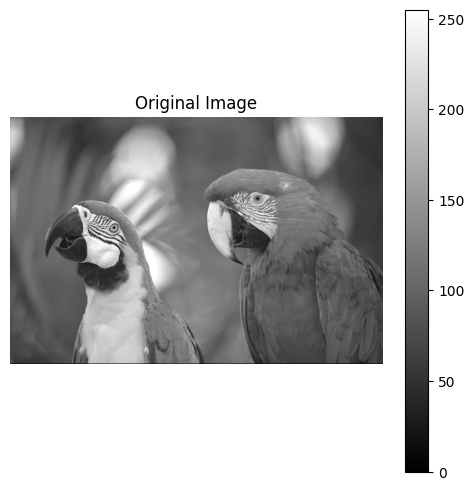

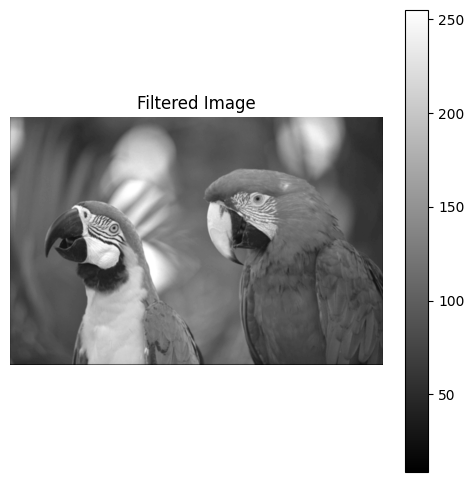

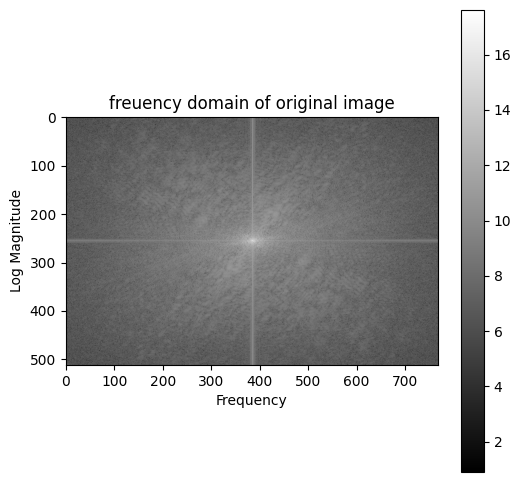

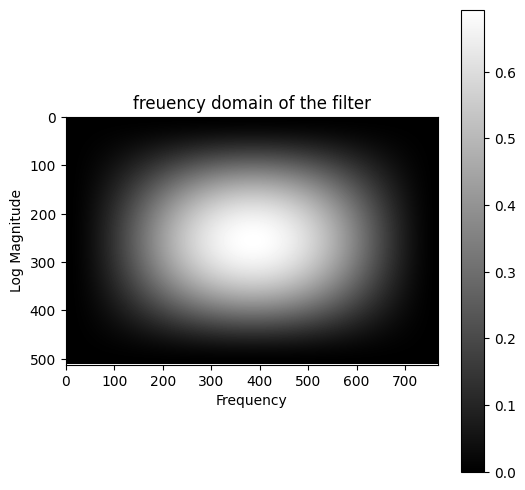

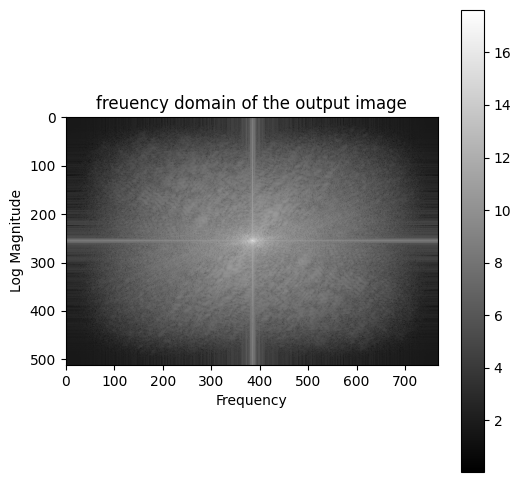

In [ ]:
image = cv2.imread('/content/drive/MyDrive/CA01_images/color_image.png',0)
image = image.astype(float)

filter_1 = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
plot_filtering(image,filter_1)

### H2:

It is a highpass filter as its values sum to 0. The highpass filter is used for edge detection

As it can be seen from the frequency domain plots, the highpass filter only passes values outside a specefic range (which can be seen as a dark circle).



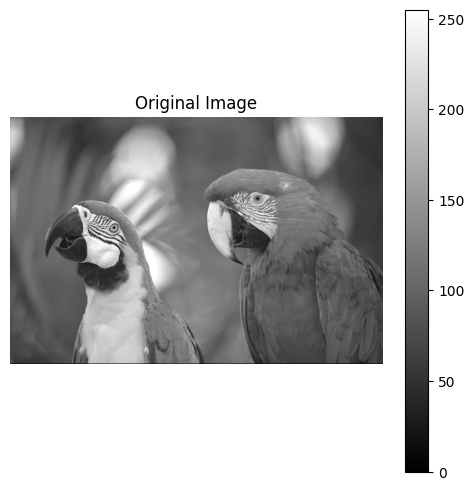

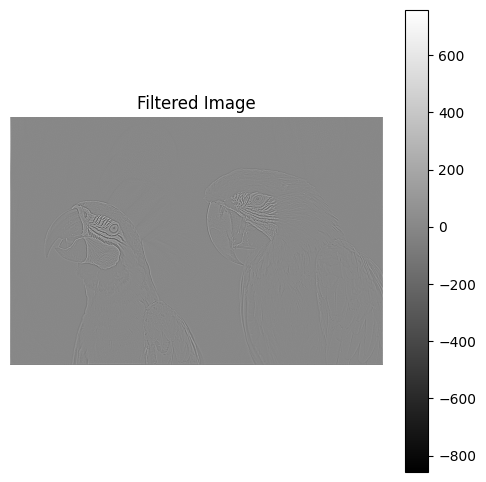

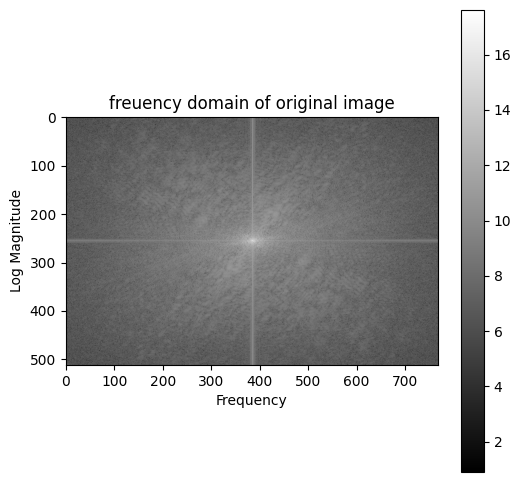

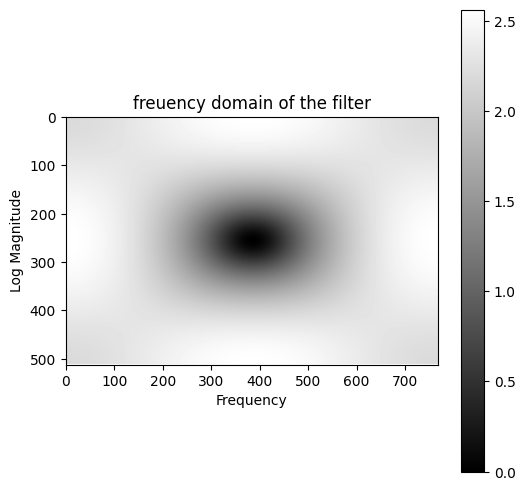

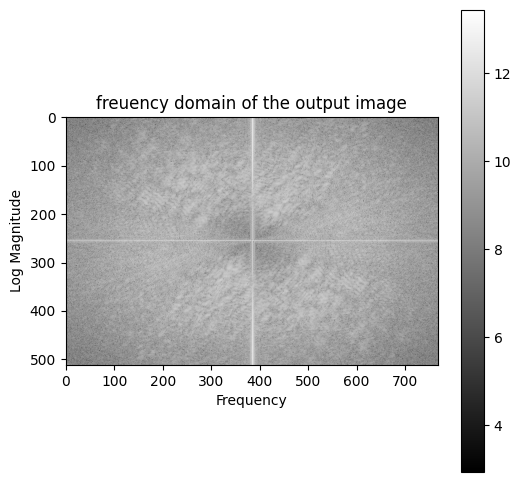

In [ ]:
filter_2 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
plot_filtering(image,filter_2)

### H3:
It is a high emphasis filter as its values sum to 1, and it contains negative values too. It is used for edge sharpening, which can also be seen from the frequency responses below:

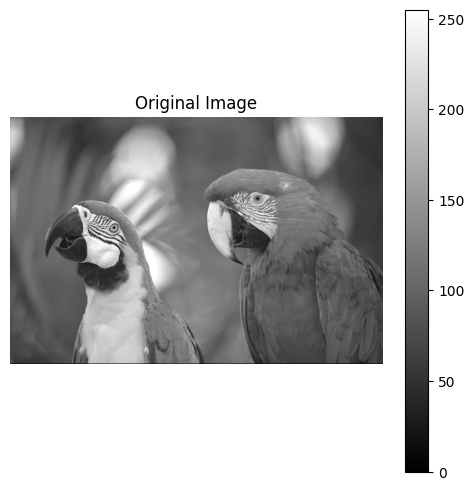

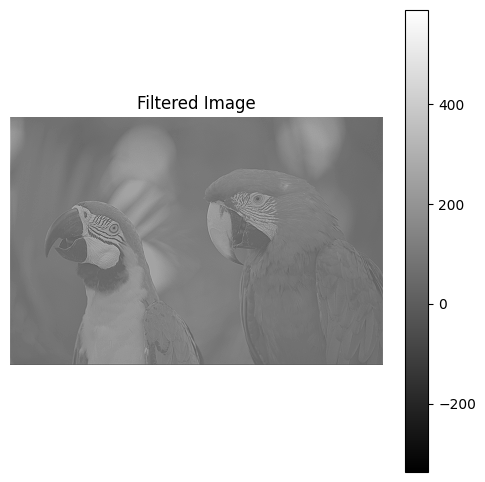

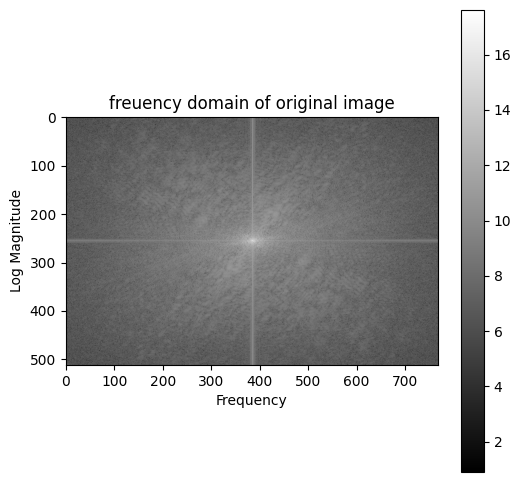

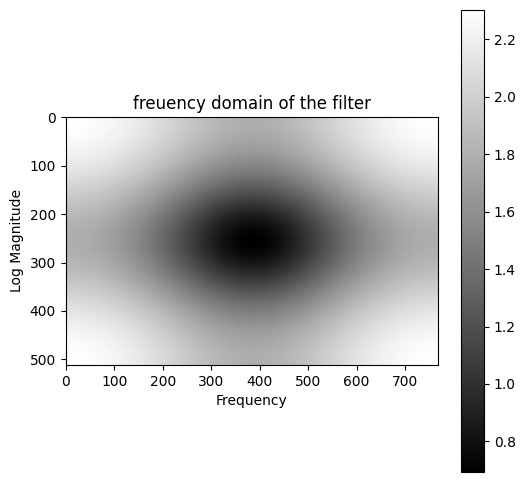

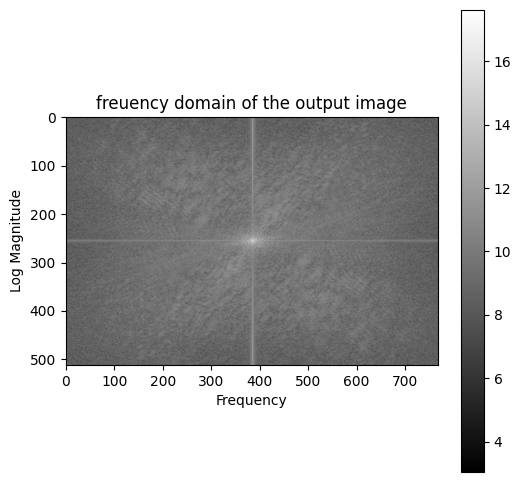

In [ ]:
filter_3 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
plot_filtering(image,filter_3)